## Bản tin thống kê sơ bộ điểm thi THPTQG năm 2023 của cả nước

Dựa trên repo sau đây: https://github.com/thevivotran/diem_thi_2022 và bản gốc https://github.com/anhdung98/diem_thi_2023, dưới đây là toàn bộ phiên bản riêng của tỉnh Tây Ninh (chưa cập nhật điểm phúc khảo)

### Bước 1: Thêm các thư viện cần thiết

In [1]:
from matplotlib import *
import pandas as pd
import numpy as np

### Bước 2: Truy xuất dữ liệu và thống kê

In [2]:
f = open('diem_thi_thpt_2023.csv', 'r').read()

In [3]:
f = [line.split(',') for line in f.splitlines()]

In [4]:
df = pd.DataFrame(f[1:], columns=f[0])

In [5]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,8.5,9.2,,,,6.75,6.0,9.0,N1
1,01000002,7.2,8.5,9.2,,,,8.75,6.5,8.5,N1
2,01000003,,6.5,,,,,9.25,7.5,,
3,01000004,7.8,8.25,7.8,,,,4.5,6.25,8.25,N1
4,01000005,7.2,8.0,7.8,,,,4.75,6.75,8.25,N1


### Bước 3: Xử lý mã tỉnh

In [6]:
testSubject = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
for s in testSubject:
    df[s]= pd.to_numeric(df[s], errors='coerce')
df['ma_tinh'] = df.apply(lambda row: str(row['sbd'])[:2], axis=1)

In [7]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh
0,01000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1,01
1,01000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1,01
2,01000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,,01
3,01000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1,01
4,01000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1,01


### Bước 4: Kiểm tra phổ điểm tất cả môn thi

<Axes: >

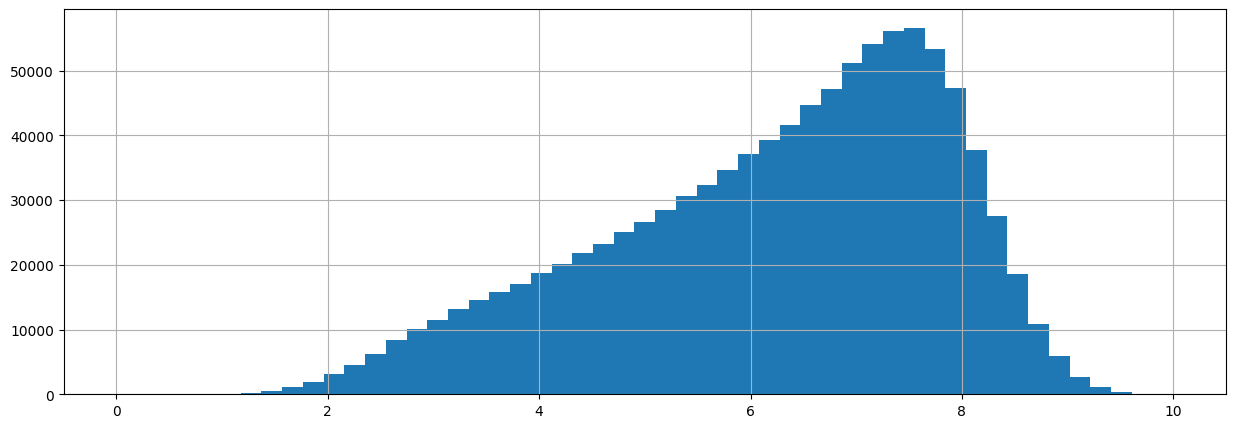

In [8]:
df.toan.hist(bins = 51,figsize = (15,5))

<Axes: >

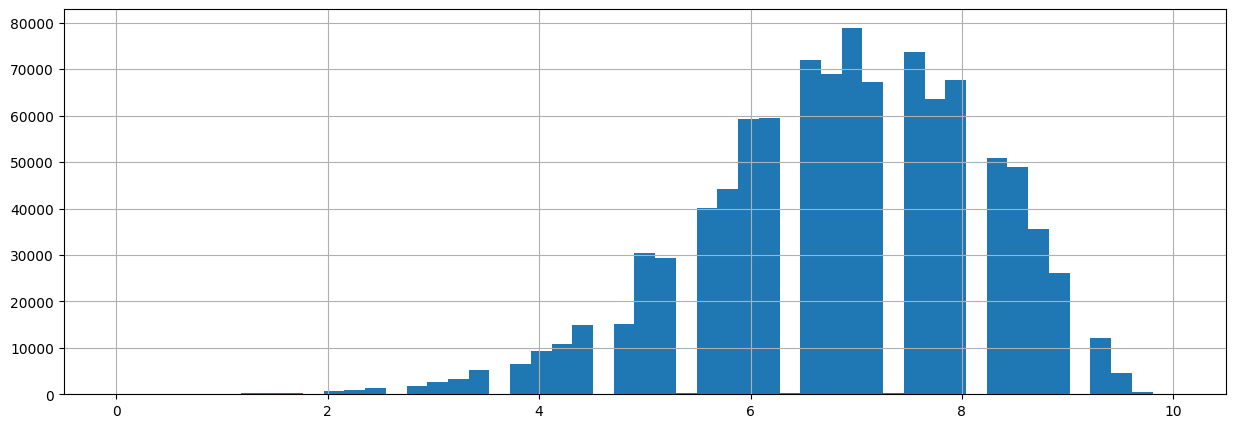

In [9]:
df.ngu_van.hist(bins = 51,figsize = (15,5))

<Axes: >

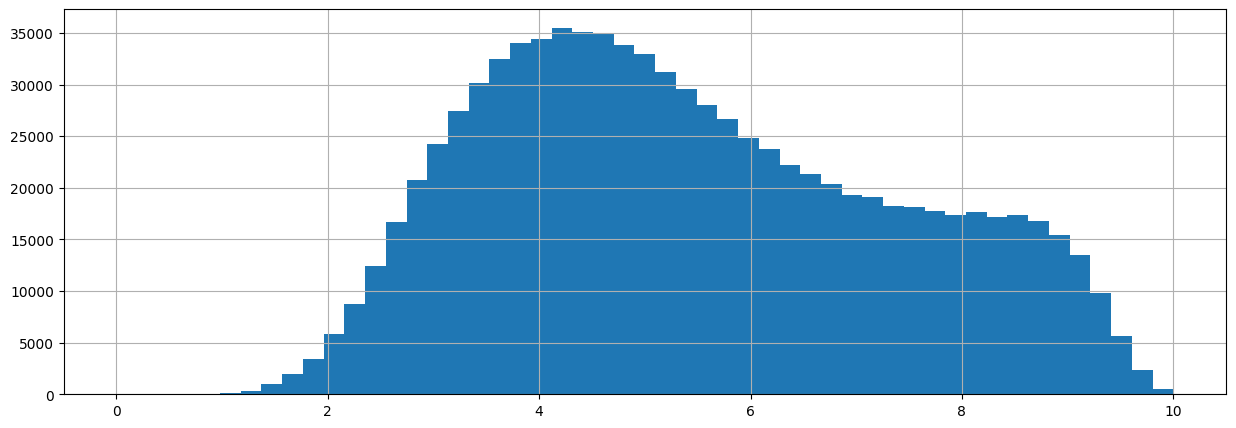

In [10]:
df.ngoai_ngu.hist(bins = 51,figsize = (15,5))

<Axes: >

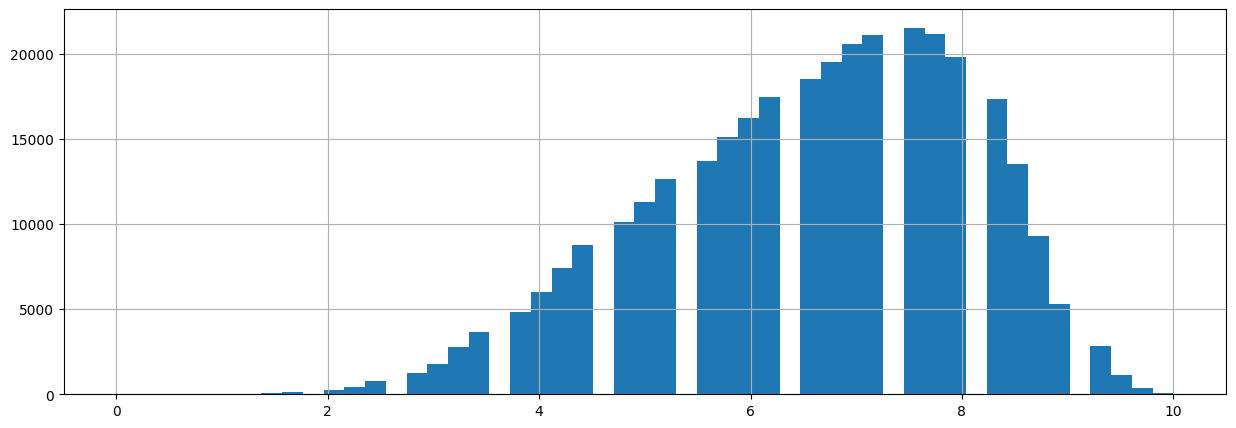

In [11]:
df.vat_li.hist(bins = 51,figsize = (15,5))

<Axes: >

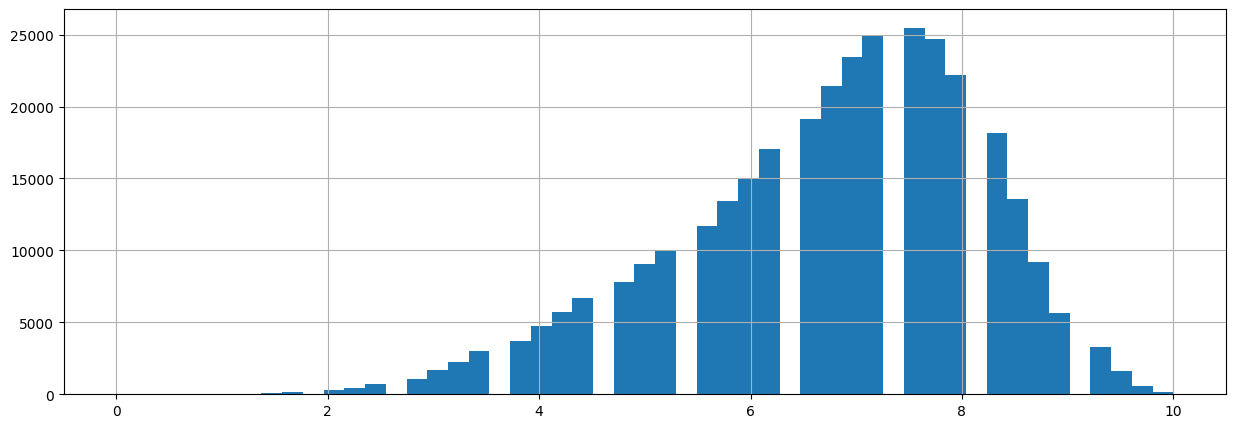

In [12]:
df.hoa_hoc.hist(bins = 51,figsize = (15,5))

<Axes: >

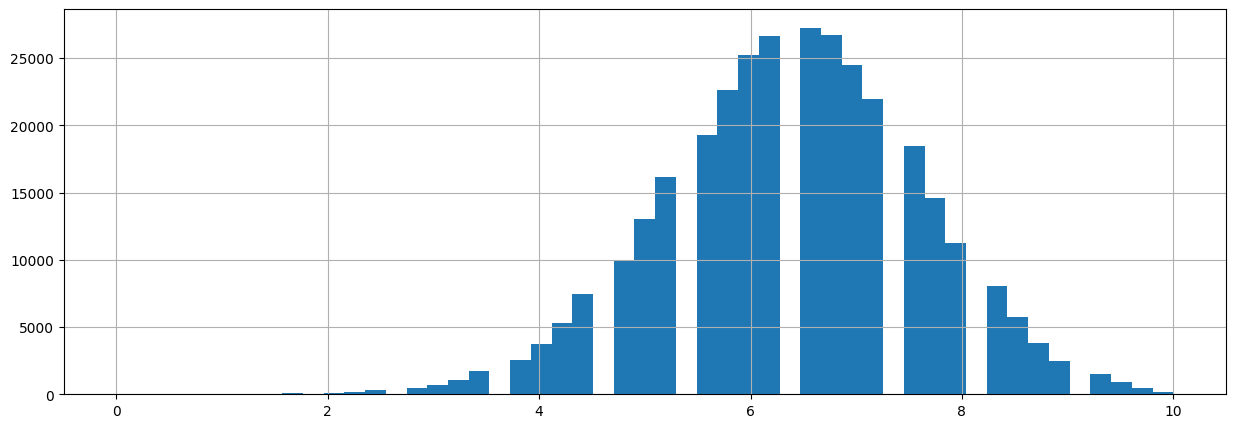

In [13]:
df.sinh_hoc.hist(bins = 51,figsize = (15,5))

<Axes: >

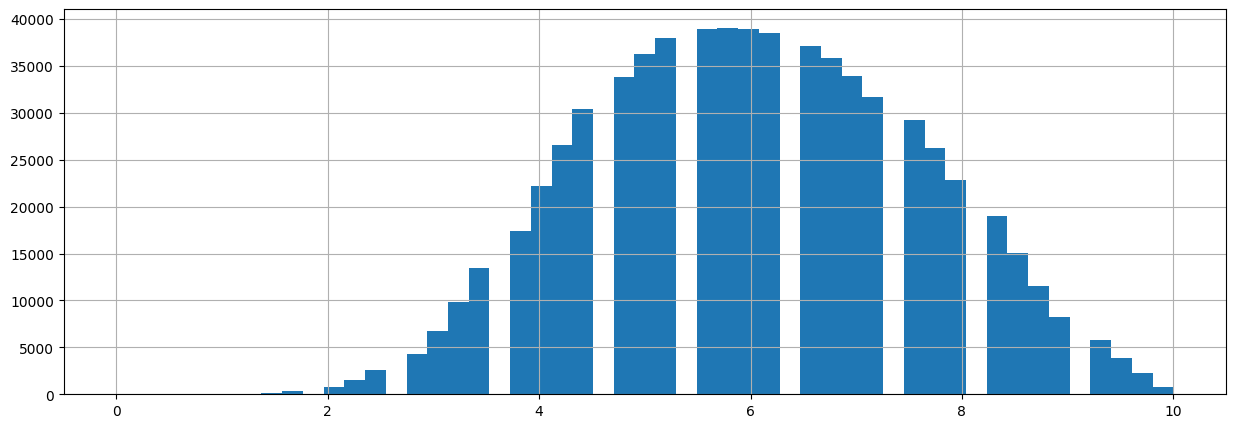

In [14]:
df.lich_su.hist(bins = 51,figsize = (15,5))

<Axes: >

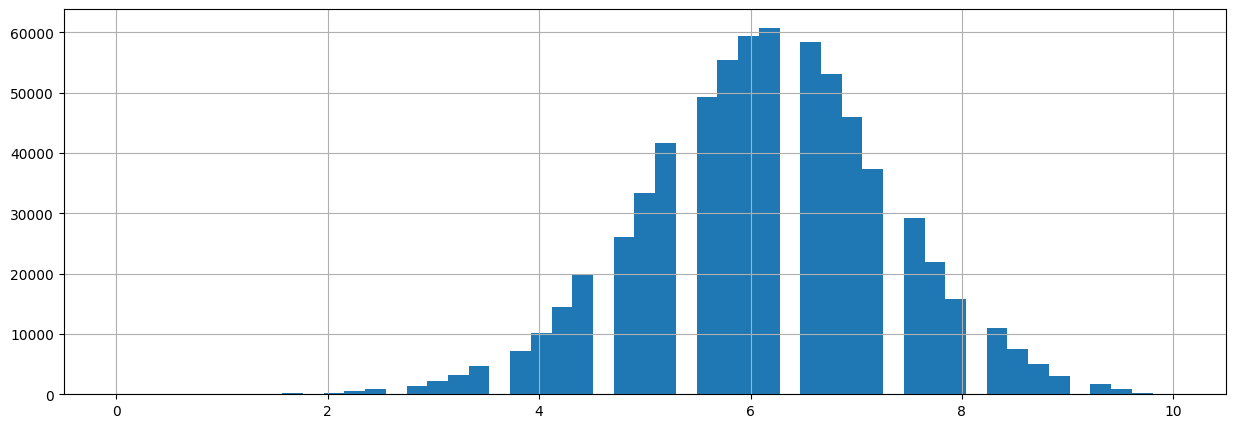

In [15]:
df.dia_li.hist(bins = 51,figsize = (15,5))

<Axes: >

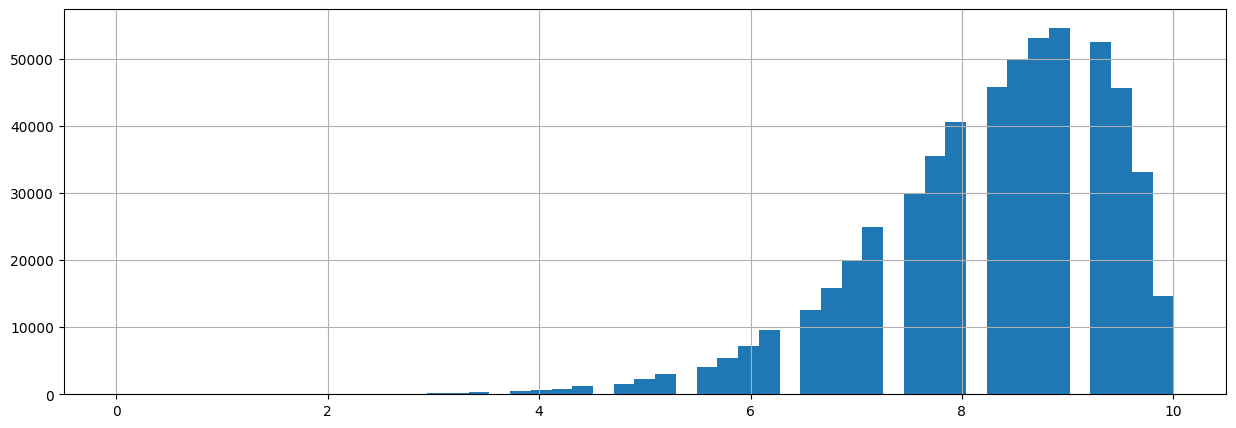

In [16]:
df.gdcd.hist(bins = 51,figsize = (15,5))

### Bước 5: Kiểm tra phổ điểm tỉnh Tây Ninh và so sánh với một số thành phố trực thuộc Trung ương

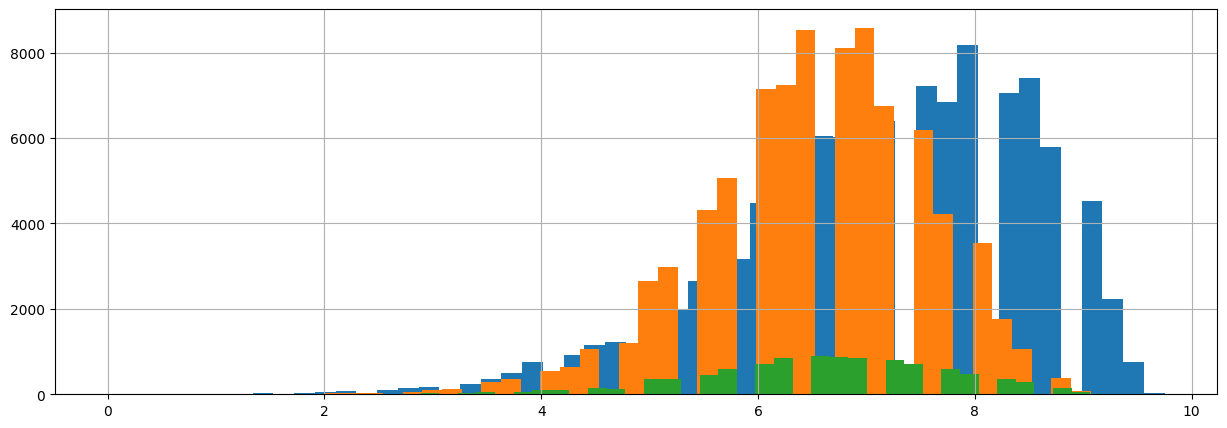

In [17]:
# Ha Noi, Ho Chi Minh, Tay Ninh
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

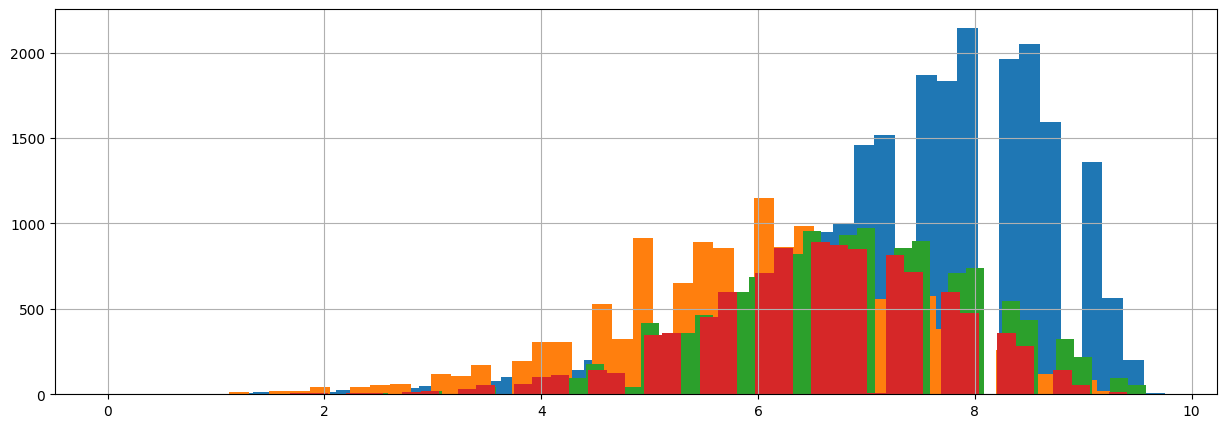

In [18]:
# Hai Phong, Da Nang, Can Tho, Tay Ninh
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].ngu_van.hist(bins = 51, figsize = (15,5))

### Bước 6: Xử lý tổng điểm 5 khối quan trọng

In [19]:
def comboundScore(row):
    toan = row.toan
    li = row.vat_li
    hoa = row.hoa_hoc
    sinh = row.sinh_hoc
    su = row.lich_su
    dia = row.dia_li
    van = row.ngu_van
    nn = row.ngoai_ngu
    
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(hoa) is True:
        a00 = toan + li + hoa
    else:
        a00 = np.NaN
        
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(nn) is True:
        a01 = toan + li + nn
    else:
        a01 = np.NaN

    if pd.notna(toan) is True and pd.notna(hoa) is True and pd.notna(sinh) is True:
        b00 = toan + hoa + sinh
    else:
        b00 = np.NaN
        
    if pd.notna(van) is True and pd.notna(su) is True and pd.notna(dia) is True:
        c00 = van + su + dia
    else:
        c00 = np.NaN

    if pd.notna(toan) is True and pd.notna(van) is True and pd.notna(nn) is True:
        d00 = toan + van + nn
    else:
        d00 = np.NaN

    if pd.notna(su) is True and pd.notna(van) is True and pd.notna(nn) is True:
        d14 = su + van + nn
    else:
        d14 = np.NaN

    return a00, a01, b00, c00, d00, d14

In [20]:
df['a00'], df['a01'], df['b00'], df['c00'], df['d00'], df['d14']  = zip(*df.apply(comboundScore, axis=1))

In [21]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh,a00,a01,b00,c00,d00,d14
0,01000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1,01,NaN,NaN,NaN,21.25,26.10,24.45
1,01000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1,01,NaN,NaN,NaN,23.75,24.90,26.45
2,01000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,,01,NaN,NaN,NaN,23.25,NaN,NaN
3,01000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1,01,NaN,NaN,NaN,19.00,23.85,20.55
4,01000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1,01,NaN,NaN,NaN,19.50,23.00,20.55


### Bước 7: Kiểm tra phổ điểm khối A01 và khối C với hai đô thị đặc biệt 

<Axes: >

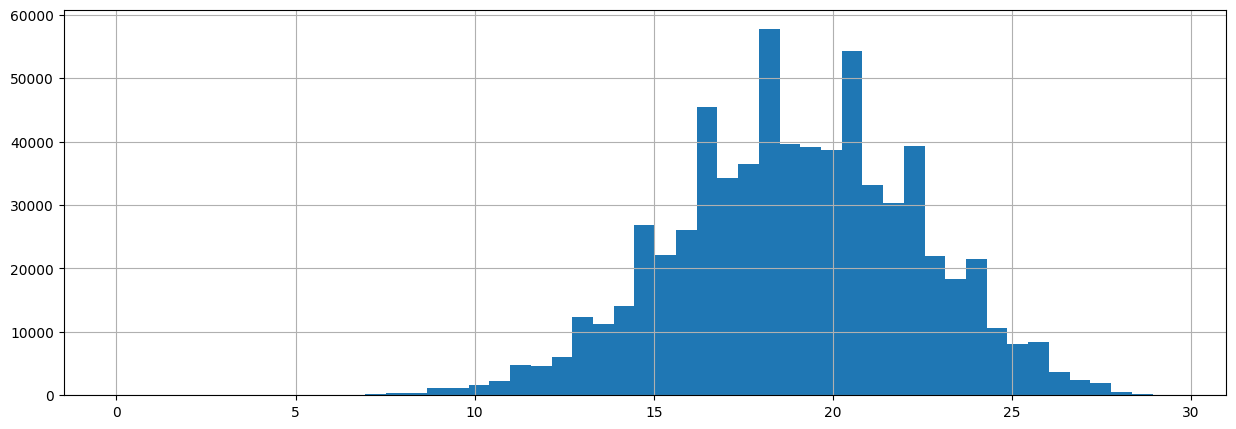

In [22]:
df.c00.hist(bins = 51,figsize = (15,5))

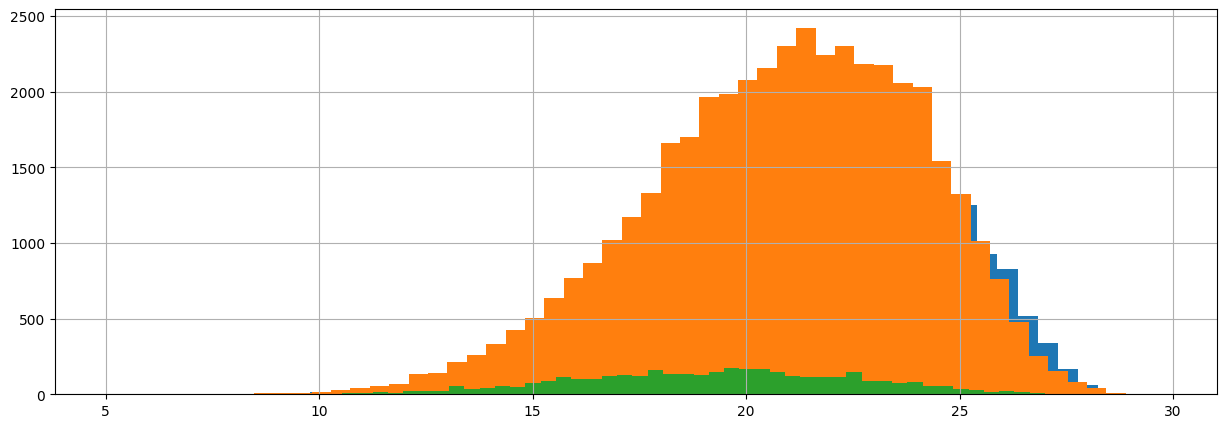

In [23]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].a01.hist(bins = 51, figsize = (15,5))

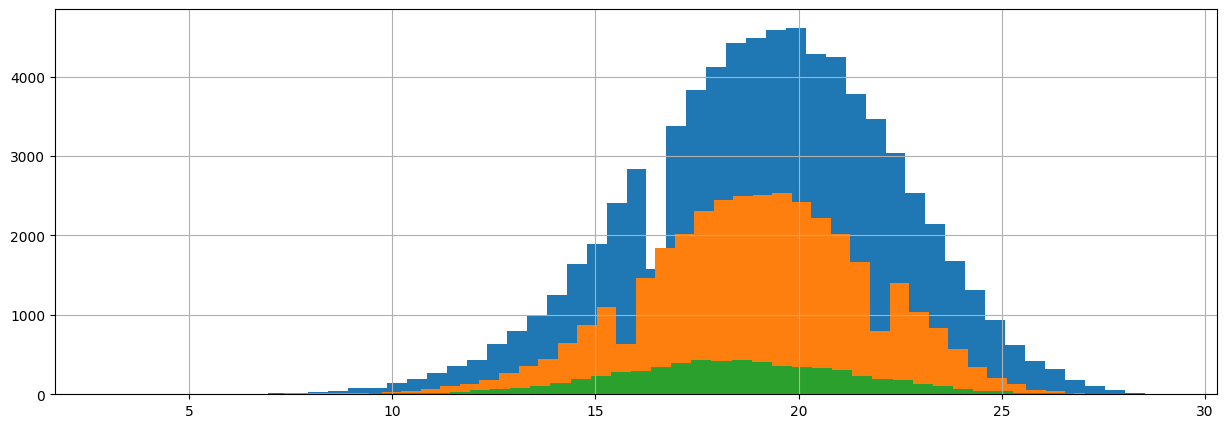

In [24]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].c00.hist(bins = 51, figsize = (15,5))

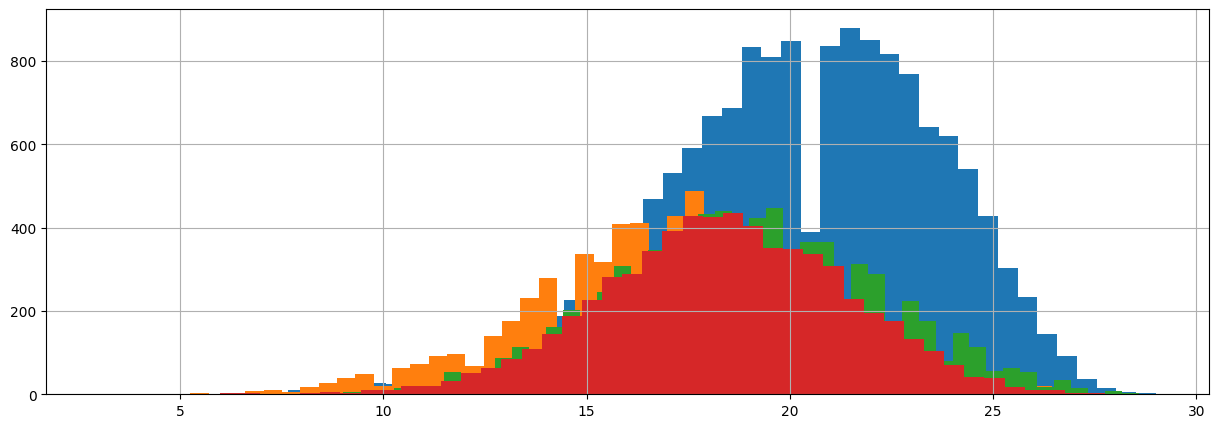

In [31]:
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].c00.hist(bins = 51, figsize = (15,5))

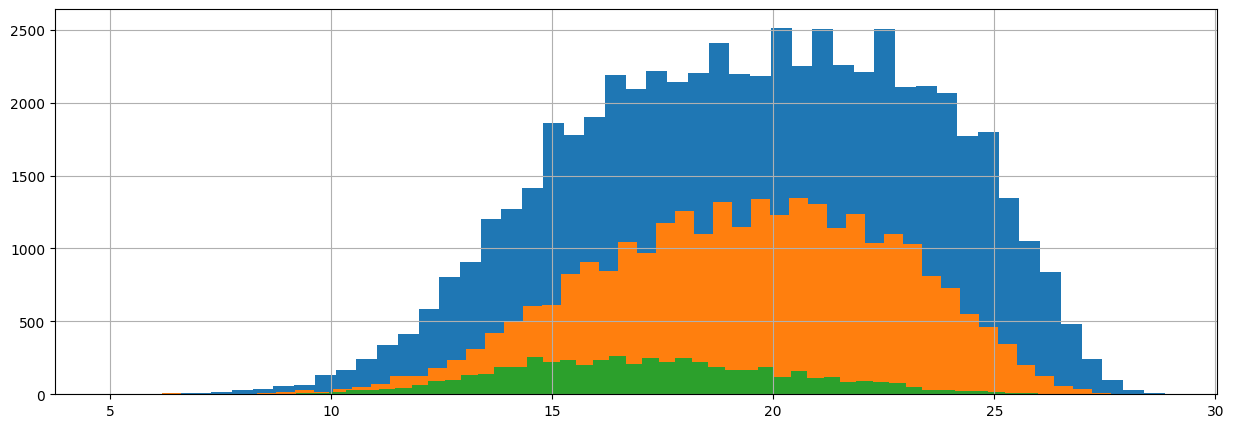

In [32]:
for ma_tinh in ['01', '02', '46']:
    df[df['ma_tinh'] == ma_tinh].d14.hist(bins = 51, figsize = (15,5))

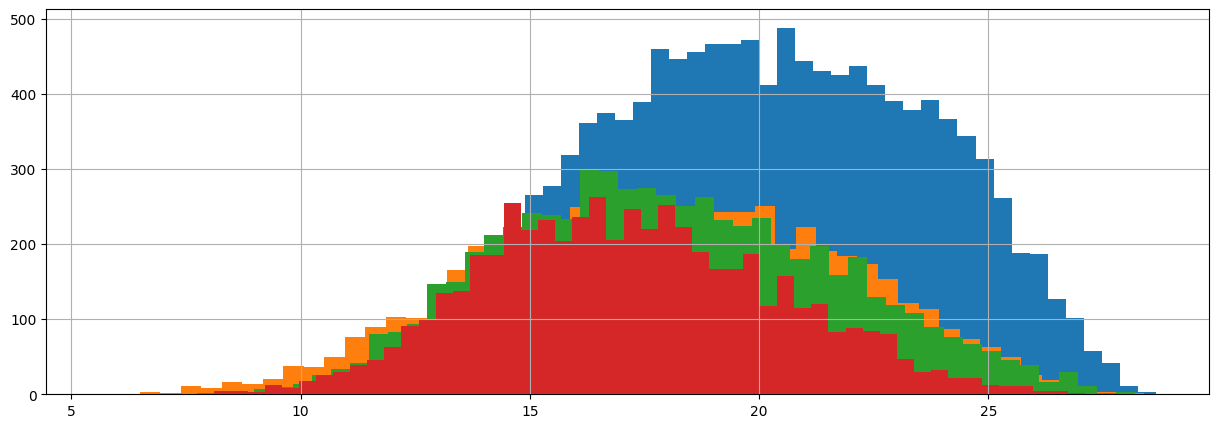

In [33]:
for ma_tinh in ['03', '04', '55', '46']:
    df[df['ma_tinh'] == ma_tinh].d14.hist(bins = 51, figsize = (15,5))

### Bước 8: Lọc dữ liệu toàn tỉnh Tây Ninh

In [25]:
tay_ninh = df[(df.ma_tinh == '46')]
tay_ninh.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,ma_tinh,a00,a01,b00,c00,d00,d14
780679,46000001,7.4,8.00,8.0,NaN,NaN,NaN,7.50,6.50,7.25,N1,46,NaN,NaN,NaN,22.00,23.4,23.50
780680,46000002,7.2,8.00,7.0,NaN,NaN,NaN,7.25,6.50,8.50,N1,46,NaN,NaN,NaN,21.75,22.2,22.25
780681,46000003,8.2,8.50,3.0,6.0,7.0,5.75,NaN,NaN,NaN,N1,46,21.2,17.2,20.95,NaN,19.7,NaN
780682,46000004,4.2,6.25,NaN,NaN,NaN,NaN,5.25,6.25,NaN,,46,NaN,NaN,NaN,17.75,NaN,NaN
780683,46000005,6.6,7.50,4.8,NaN,NaN,NaN,6.00,6.75,8.75,N1,46,NaN,NaN,NaN,20.25,18.9,18.30


### Bước 9: Tiến hành lọc tỷ lệ và vị trí tương ứng

In [26]:
def percentage(sbd, khoi):
    thi_sinh = df[df.sbd == sbd]
    diem = thi_sinh[khoi].values[0]
    ma_tinh = thi_sinh.ma_tinh.values[0]
    df_tinh = df[(df.ma_tinh == ma_tinh)]
    ti_le_tinh = len(df_tinh[(df_tinh[khoi] >= diem)]) / len(df_tinh[(df_tinh[khoi] >= 0)])
    ti_le_quoc_gia = len(df[(df[khoi] >= diem)]) / len(df[(df[khoi] >= 0)])
    
    print('''Điểm khối {} của thí sinh {} là: {}. Thuộc top:
    {:%} tỉnh
    {:%} quốc gia'''.format(khoi, sbd, diem, ti_le_tinh, ti_le_quoc_gia))

In [27]:
percentage('46000001', 'c00')

Điểm khối c00 của thí sinh 46000001 là: 22.0. Thuộc top:
    12.633900% tỉnh
    20.107727% quốc gia


In [28]:
percentage('46000001', 'd00')

Điểm khối d00 của thí sinh 46000001 là: 23.4. Thuộc top:
    5.867515% tỉnh
    13.117435% quốc gia


In [29]:
percentage('46002161', 'd14')

Điểm khối d14 của thí sinh 46002161 là: 26.55. Thuộc top:
    0.092678% tỉnh
    0.777262% quốc gia


In [30]:
percentage('46002161', 'd00')

Điểm khối d00 của thí sinh 46002161 là: 21.65. Thuộc top:
    15.628427% tỉnh
    26.126671% quốc gia
